In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving NonDoh.csv to NonDoh.csv


In [ ]:
data=pd.read_csv("NonDoh.csv")
data.head()

,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,Label
0,86.40,9.29516,60.0,54.0,NonDoH
1,9.00,3.00000,57.0,57.0,NonDoH
2,30.25,5.50000,60.5,60.5,NonDoH
3,6.25,2.50000,57.5,57.5,NonDoH
4,30.25,5.50000,60.5,60.5,NonDoH


In [ ]:
data=data.iloc[:,:-1]
data

,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian
0,86.40,9.295160,60.0,54.0
1,9.00,3.000000,57.0,57.0
2,30.25,5.500000,60.5,60.5
3,6.25,2.500000,57.5,57.5
4,30.25,5.500000,60.5,60.5
5,30.25,5.500000,60.5,60.5
6,30.25,5.500000,60.5,60.5
7,30.25,5.500000,60.5,60.5
8,214.56,14.647867,64.2,60.0
9,347.04,18.629010,70.6,60.0


In [ ]:
data.head()

,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian
0,86.40,9.29516,60.0,54.0
1,9.00,3.00000,57.0,57.0
2,30.25,5.50000,60.5,60.5
3,6.25,2.50000,57.5,57.5
4,30.25,5.50000,60.5,60.5


In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 3].values
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=13)

In [ ]:
params = {'n_estimators': 3,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [ ]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.7935


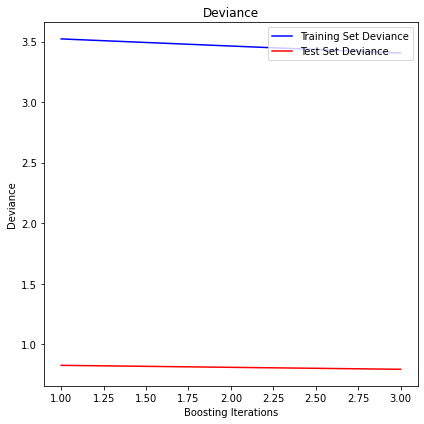

In [ ]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()